# Análise de Dados para a empresa House Rocket.

### A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

## Quais questões esperam ser respondidas a partir dessa análise? 
* Quantas casas tem nenhum, um ou mais de um quarto?
* Quantas casas tem um ou mais de um andar?
* Quantas casas estão em perfeitas ou em péssimas condições?
* Quantos quartos, em média, as casas possuem?
* Qual o preço médio das casas?
* Qual o desvio padrão do preço?
* Quais são os 1Q e 3Q dos preços?
* Existem preços de casas que são outliers?
* Qual a relação entre o preço médio das casas e a quantidade de quartos?
* Qual foi o crescimento do preço dos imóveis ano após ano?
* Qual foi o crescimento do preço dos imóveis mês após mês?

## 0.0 Importando as bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1.0 Dados

### 1.1 Importando o dataframe:

In [2]:
dataFrame = pd.read_csv("../data/kc_house_data.csv")

### 1.1 Mostrando parte do dataframe:

In [3]:
dataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Dimensão dos dados:

In [4]:
print("Número de linhas: {}".format(dataFrame.shape[0]))
print("Número de colunas: {}".format(dataFrame.shape[1]))

Número de linhas: 21613
Número de colunas: 21


### 1.3 Tipo de variáveis:

In [5]:
dataFrame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 1.4 Alterando alguns tipos de variáveis:

In [6]:
dataFrame['date'] = pd.to_datetime(dataFrame['date']) 

### 1.5 Criando alguns recursos extras para o dataframe:

In [7]:
dataFrame['mes'] = dataFrame['date'].dt.month
dataFrame['ano'] = dataFrame['date'].dt.year

### 1.6 Estatística geral dos dados:

In [8]:
# Incluindo apenas as variáveis numéricas:
var_num = dataFrame.select_dtypes(include=['int64', 'float64'])

# Deletando a coluna 'id', pois não é numérica:
var_num = var_num.iloc[:, 1: ]

              var           mean       median            std         min  \
0           price  540088.141767  450000.0000  367118.703181  75000.0000   
1        bedrooms       3.370842       3.0000       0.930040      0.0000   
2       bathrooms       2.114757       2.2500       0.770145      0.0000   
3     sqft_living    2079.899736    1910.0000     918.419649    290.0000   
4        sqft_lot   15106.967566    7618.0000   41419.553273    520.0000   
5          floors       1.494309       1.5000       0.539976      1.0000   
6      waterfront       0.007542       0.0000       0.086515      0.0000   
7            view       0.234303       0.0000       0.766300      0.0000   
8       condition       3.409430       3.0000       0.650728      1.0000   
9           grade       7.656873       7.0000       1.175432      1.0000   
10     sqft_above    1788.390691    1560.0000     828.071820    290.0000   
11  sqft_basement     291.509045       0.0000     442.564804      0.0000   
12       yr_

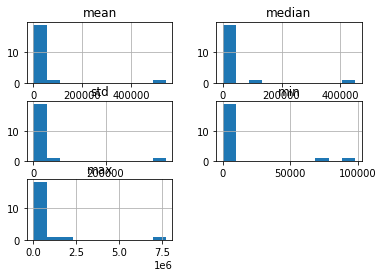

In [9]:
# Média e mediana:
mean = pd.DataFrame(var_num.apply(np.mean)).T
median = pd.DataFrame(var_num.apply(np.median)).T

# Dispersão:
std = pd.DataFrame(var_num.apply(np.std)).T
min = pd.DataFrame(var_num.apply(np.min)).T
max = pd.DataFrame(var_num.apply(np.max)).T

# Concatenando as variáveis, a fim de gerar a tabela:
tab = pd.concat([mean, median, std, min, max]).T.reset_index()

tab.columns = ['var', 'mean', 'median', 'std', 'min', 'max']
print(tab)
tab.hist();

### 1.7 Correlação dos dados

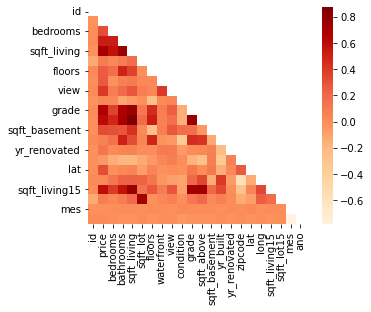

In [10]:
c = dataFrame.corr()
m = np.triu(c)
sns.heatmap(c, cmap='OrRd', square=True, annot=False, center=0, mask=m);

## 2.0 Respondendo as questões

### 2.1 **Quantas casas tem nenhum, um ou mais de um quarto?**

#### 2.1.1 Filtrando as casas com um e nenhum quarto:

In [11]:
house_with_none_bedrooms = dataFrame.query('bedrooms == 0').__len__()
house_with_one_bedrooms = dataFrame.query('bedrooms == 1').__len__()
house_with_moreOne_bedrooms = dataFrame.query('bedrooms > 1').__len__()

#### 2.1.2 Plotando a quantidade de casas que possuem um e nenhum quarto:

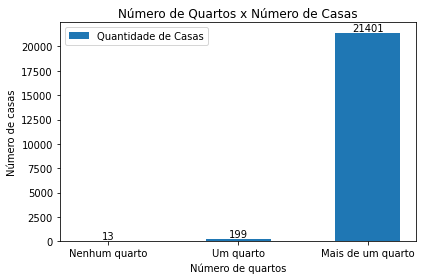

In [12]:
quartos = ['Nenhum quarto', 'Um quarto', 'Mais de um quarto']
casas = [house_with_none_bedrooms, house_with_one_bedrooms, house_with_moreOne_bedrooms]

x = np.arange(len(quartos))

fig, ax = plt.subplots()

rect = ax.bar(x, casas, width=0.5, label="Quantidade de Casas")

ax.set_ylabel("Número de casas")
ax.set_xlabel("Número de quartos")
ax.set_title("Número de Quartos x Número de Casas")
ax.set_xticks(x, quartos)
ax.legend()

ax.bar_label(rect, padding=0.1)
fig.tight_layout()
plt.show()

### 2.2 **Quantas casas tem um ou mais de um andar?**

#### 2.2.1 Filtrando as casas com mais de um andar e nenhum andar:

In [13]:
house_with_moreOne_floors = dataFrame.query('floors > 1').__len__()
house_with_one_bedrooms = dataFrame.query('floors == 1').__len__()

#### 2.2.2 Plotando a quantidade de casas que possuem mais de um andar e exatamente um andar:

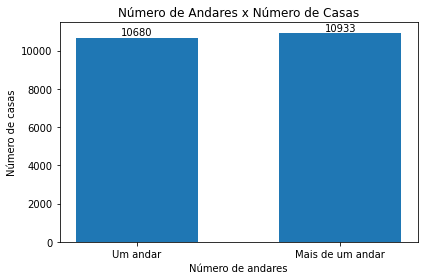

In [14]:
andares = ['Um andar', 'Mais de um andar']
casas = [house_with_one_bedrooms, house_with_moreOne_floors]

x = np.arange(len(andares))

fig, ax = plt.subplots()

rect = ax.bar(x, casas, width=0.6)

ax.set_ylabel("Número de casas")
ax.set_xlabel("Número de andares")
ax.set_title("Número de Andares x Número de Casas")
ax.set_xticks(x, andares)

ax.bar_label(rect, padding=0.1)
fig.tight_layout()
plt.show()

### 2.3 **Quantas casas estão em perfeitas ou em péssimas condições?**

#### 2.3.1 Filtrando as casas que estão em perfeitas e em más condições:

In [15]:
house_bad_condition = dataFrame.query('condition == 1').__len__()
house_good_condition = dataFrame.query('condition == 5').__len__()

#### 2.3.2 Plotando a quantidade de casas em perfeitas ou em más condições:

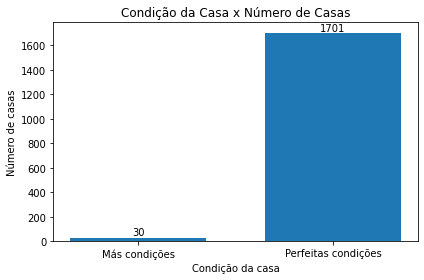

In [16]:
condição = ['Más condições', 'Perfeitas condições']
casas = [house_bad_condition, house_good_condition]

x = np.arange(len(condição))

fig, ax = plt.subplots()

rect = ax.bar(x, casas, width=0.7)

ax.set_ylabel("Número de casas")
ax.set_xlabel("Condição da casa")
ax.set_title("Condição da Casa x Número de Casas")
ax.set_xticks(x, condição)

ax.bar_label(rect, padding=0.1)
fig.tight_layout()
plt.show()

### 2.4 **Quantos quartos, em média, as casas possuem?**

#### 2.4.1 Calculando a média de quartos, de todas as casas:

In [17]:
mean_bedrooms = dataFrame['bedrooms'].mean()
print('A média de quartos, que as casas possuem, é de aproximadamente {}!'.format(round(mean_bedrooms, 2)))

A média de quartos, que as casas possuem, é de aproximadamente 3.37!


### 2.5 **Qual o preço médio das casas?**

#### 2.5.1 Calculando o preço médio das casas:

In [18]:
mean_price = dataFrame['price'].mean()
print('O preço médio das casas é de aproximadamente ${} !'.format(round(mean_price, 2)))

O preço médio das casas é de aproximadamente $540088.14 !


### 2.6 **Qual o desvio padrão do preço?**

#### 2.6.1 Calculando o desvio padrão dos preços:

In [19]:
std_price = dataFrame['price'].std()
print('O desvio padrão dos preços é de ${} !'.format(round(std_price, 2)))

O desvio padrão dos preços é de $367127.2 !


### 2.7 **Quais são os 1Q e 3Q dos preços?**

#### 2.7.1 Calculando o primero e terceiro quartil do preço:

In [20]:
q1 = dataFrame['price'].quantile(0.25)
q3 = dataFrame['price'].quantile(0.75)
print('O primeiro quartil, 1Q, do preço é de: ${}'.format(q1))
print('O terceiro quartil, 3Q, do preço é de: ${}'.format(q3))

O primeiro quartil, 1Q, do preço é de: $321950.0
O terceiro quartil, 3Q, do preço é de: $645000.0


### 2.8 **Existem preços de casas que são outliers?**

#### 2.8.1 Boxplot dos preços:

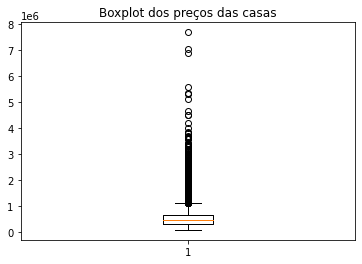

In [21]:
boxplot = dataFrame['price']
plt.boxplot(boxplot)
plt.title("Boxplot dos preços das casas")
plt.show()

##### A partir do gráfico acima, podemos verificar a variação dos preços das casas e afirmar que há preços que são outliers, nesse caso, que se distanciam dos demais preços!

### 2.9 **Qual a relação entre o preço médio das casas e a quantidade de quartos?**

#### 2.9.1 Agrupando a quantidade de quartos com o preço médio:

In [22]:
group_price_bedrooms = dataFrame[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
group_price_bedrooms

,bedrooms,price
0,0,4.095038e+05
1,1,3.176429e+05
2,2,4.013727e+05
3,3,4.662321e+05
4,4,6.354195e+05
5,5,7.865998e+05
6,6,8.255206e+05
7,7,9.511847e+05
8,8,1.105077e+06
9,9,8.939998e+05


#### 2.9.2 Plotando a relação entre o preço médio das casas com a quantidade de quartos:

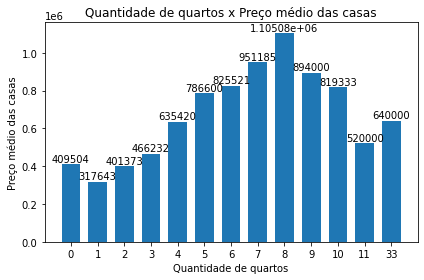

In [23]:
num_bedrooms = list(group_price_bedrooms['bedrooms'])
num_mean_price = list(group_price_bedrooms['price'])

x = np.arange(len(num_bedrooms))

fig, ax = plt.subplots()

rect = ax.bar(x, num_mean_price, width=0.7)

ax.set_ylabel("Preço médio das casas")
ax.set_xlabel("Quantidade de quartos")
ax.set_title("Quantidade de quartos x Preço médio das casas")
ax.set_xticks(x, num_bedrooms)

ax.bar_label(rect, padding=0.1)
fig.tight_layout()
plt.show()

### 2.10 **Qual foi o crescimento do preço das casas ano após ano?**

#### 2.10.1 Agrupando o preço das casas com o respectivo ano:

In [24]:
group_price_year = dataFrame[['price', 'ano']].groupby('ano').sum().reset_index()
group_price_year['ano'] = group_price_year['ano'].astype(str)
group_price_year

,ano,price
0,2014,7.889842e+09
1,2015,3.783083e+09


#### 2.10.2 Plotando o crescimento do preço das casas ano após ano:

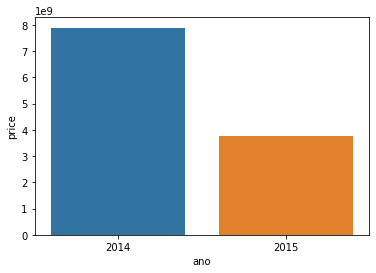

In [25]:
sns.barplot(x=group_price_year['ano'], y=group_price_year['price']);

### 2.11 **Qual foi o crescimento do preço das casas mês após mês?**

#### 2.11.1 Agrupando o preço das casas com o seu respectivo mês:

In [26]:
group_price_mes = dataFrame[['price', 'mes']].groupby('mes').sum().reset_index()
group_price_mes['mes'] = group_price_mes['mes'].astype(str)
group_price_mes

,mes,price
0,1,5.143017e+08
1,2,6.348142e+08
2,3,1.019957e+09
3,4,1.253460e+09
4,5,1.329556e+09
5,6,1.216445e+09
6,7,1.204528e+09
7,8,1.040704e+09
8,9,9.388963e+08
9,10,1.012293e+09


#### 2.11.2 Plotando o crescimento do preço das casas mês após mês:

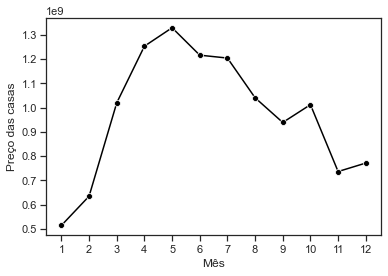

In [27]:
sns.set_theme(style='ticks')
sns.set_context('notebook')
plot = sns.lineplot(data=group_price_mes, x='mes', y='price', markers=True, style=(1), legend=False, color='black')
plot.set_xlabel("Mês")
plot.set_ylabel("Preço das casas");